In [1]:
import sys
print(sys.version)

3.5.5 |Anaconda, Inc.| (default, May 13 2018, 21:12:35) 
[GCC 7.2.0]


In [2]:
import numpy as np 
import pandas as pd

In [3]:
"""
        Target is 1 if there is a postive change versus last timestamp, else it is 0
"""
org_saartot_df           = pd.read_excel("../data/Original_Data/saartot-2000-2019.xlsx",sheet_name="Sheet1",header=None)
org_saartot_df.drop([4],axis=1,inplace=True)
org_saartot_df.dropna(subset=[0],inplace=True)
print(len(org_saartot_df))
org_saartot_df = org_saartot_df.rename(index=str,columns={0:"Timestamp",1:"Value",2:"Absolute_change",3:"Percentage_change"})
org_saartot_df['Target'] = org_saartot_df["Absolute_change"].apply(lambda x: 1 if x>0 else 0)
y = org_saartot_df.Target
org_saartot_df.head()

230


,Timestamp,Value,Absolute_change,Percentage_change,Target
0,2019-02-28,16.56,-0.04,-0.0024,0
1,2019-01-31,16.60,-0.90,-0.0514,0
3,2018-12-31,17.50,0.10,0.0057,1
4,2018-11-30,17.40,-0.10,-0.0057,0
5,2018-10-31,17.50,0.10,0.0057,1


In [4]:
# Checking for class imbalance
print("Percentage of labels which are 1: " + str(y.sum()*100/len(y))[:5] + "%")
print("Percentage of labels which are 0: " + str(100 - (y.sum()*100/len(y)))[:5] + "%")
# There is little to no class imbalance

Percentage of labels which are 1: 48.26%
Percentage of labels which are 0: 51.73%


In [5]:
org_saartot_df['Timestamp'] = pd.to_datetime(org_saartot_df['Timestamp'])
org_saartot_df['Year'] = org_saartot_df['Timestamp'].dt.year
org_saartot_df['Month'] = org_saartot_df['Timestamp'].dt.month
org_saartot_df.head()

,Timestamp,Value,Absolute_change,Percentage_change,Target,Year,Month
0,2019-02-28,16.56,-0.04,-0.0024,0,2019,2
1,2019-01-31,16.60,-0.90,-0.0514,0,2019,1
3,2018-12-31,17.50,0.10,0.0057,1,2018,12
4,2018-11-30,17.40,-0.10,-0.0057,0,2018,11
5,2018-10-31,17.50,0.10,0.0057,1,2018,10


In [6]:
cars_df = pd.read_csv("../data/Cars_.csv")
cars_df["Timestamp"] = pd.to_datetime(cars_df['date'])
cars_df["Year"] = cars_df['Timestamp'].dt.year
cars_df["Month"] = cars_df['Timestamp'].dt.month
cars_df.head()

,date,Audi,BMW,Mini,Mercedes Benz,Mitsubishi Fuso,FCA,Honda Group,Hyundai,Isuzu,...,Subaru,Tesla,Toyota Group,Volkswagen,Volvo,year,month,Timestamp,Year,Month
0,Jan 2019,14253,18102,2457.0,23721,0.0,136082.0,106139,42020,265,...,46072,18411.0,156021,23074,5854,2019,Jan,2019-01-01,2019,1
1,Dec 2018,22765,34357,2797.0,36132,4.0,196520.0,155115,65721,534,...,64541,24712.0,220910,32047,8826,2018,Dec,2018-12-01,2018,12
2,Nov 2018,17082,28330,3528.0,32879,3.0,181310.0,120534,57499,415,...,56782,16843.0,190423,26789,8181,2018,Nov,2018-11-01,2018,11
3,Oct 2018,16056,23262,3166.0,31719,4.0,177391.0,122182,53025,387,...,55394,17851.0,191102,29000,7327,2018,Oct,2018-10-01,2018,10
4,Sep 2018,19319,25908,3461.0,30617,3.0,199819.0,132668,57359,415,...,57044,15175.0,203098,30555,8715,2018,Sep,2018-09-01,2018,9


In [7]:
# Merging the target saartot index with the sales data that we have
merged_df = pd.merge(cars_df,org_saartot_df,on=["Year","Month"],how="inner")
merged_df["y"] = merged_df["Target"].shift(1)[:-1]
cols_to_be_dropped = ["date","month","Timestamp_x","Timestamp_y","year","Target"]
merged_df.drop(cols_to_be_dropped,axis=1,inplace=True)
merged_df.dropna(inplace=True)
merged_df.head()

,Audi,BMW,Mini,Mercedes Benz,Mitsubishi Fuso,FCA,Honda Group,Hyundai,Isuzu,Jaguar Land Rover,...,Tesla,Toyota Group,Volkswagen,Volvo,Year,Month,Value,Absolute_change,Percentage_change,y
1,22765,34357,2797.0,36132,4.0,196520.0,155115,65721,534,14079.0,...,24712.0,220910,32047,8826,2018,12,17.5,0.10,0.0057,0.0
2,17082,28330,3528.0,32879,3.0,181310.0,120534,57499,415,11744.0,...,16843.0,190423,26789,8181,2018,11,17.4,-0.10,-0.0057,1.0
3,16056,23262,3166.0,31719,4.0,177391.0,122182,53025,387,10494.0,...,17851.0,191102,29000,7327,2018,10,17.5,0.10,0.0057,0.0
4,19319,25908,3461.0,30617,3.0,199819.0,132668,57359,415,9006.0,...,15175.0,203098,30555,8715,2018,9,17.4,0.80,0.0482,1.0
5,20907,23789,3800.0,24084,3.0,193718.0,147903,57542,319,9648.0,...,8514.0,223055,32255,8970,2018,8,16.6,-0.08,-0.0048,1.0


In [8]:
# Building a naive model

split_val = 50
X_train = merged_df.drop(["y"],axis=1)[split_val:]
y_train = merged_df.y[split_val:]

X_test = merged_df.drop(["y"],axis=1)[:split_val]
y_test = merged_df.y[:split_val]


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train,y_train)
y_pred_proba = LR.predict_proba(X_test)[:,1]
y_pred = LR.predict(X_test)

# Returns the mean accuracy
LR.score(X_test,y_test)

0.42

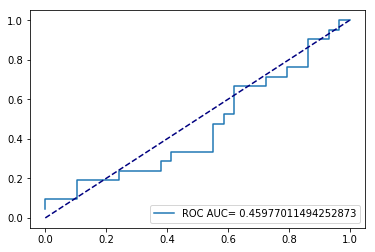

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC AUC= "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.show()

In [10]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.50      0.45      0.47        29
        1.0       0.33      0.38      0.36        21

avg / total       0.43      0.42      0.42        50

0.35555555555555557
